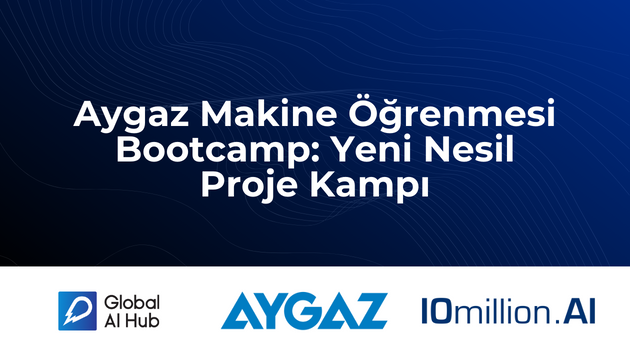


In this project, participants will work in two fundamental areas of machine learning: 

They will learn to classify data into categories for prediction purposes using supervised and unsupervised learning algorithms, predict continuous values based on input features, or cluster data based on these features.

The goal of this project is to provide students with practical experience in data analysis, model development, and evaluation techniques in the fields of Supervised and Unsupervised Learning within artificial intelligence and machine learning.

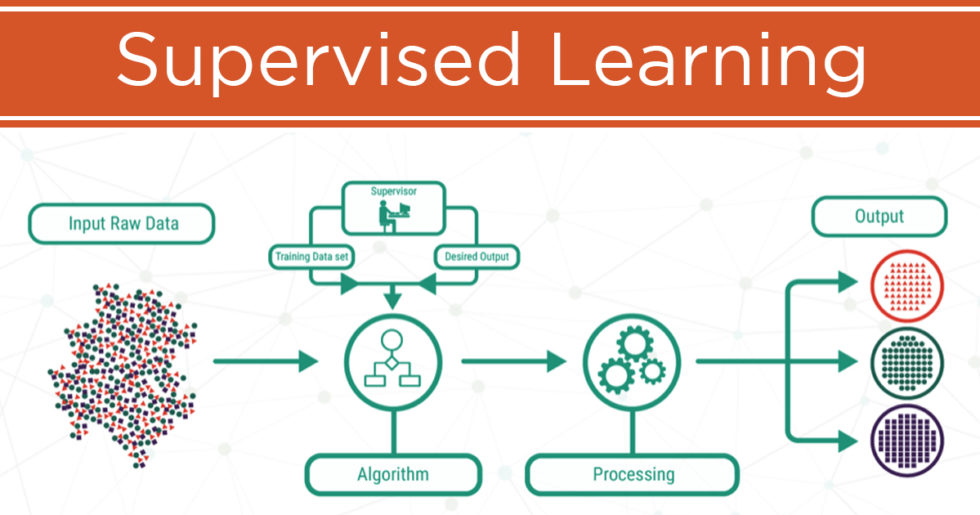


Supervised Learning is a type of machine learning where the model is trained on a labeled dataset. This means that each training example is paired with an output label, and the model learns to map inputs to the correct output. The primary goal is to make predictions or classifications based on the input data. Supervised learning can be divided into two main tasks:

Classification: The model is trained to categorize data into predefined classes or categories. For example, classifying emails as 'spam' or 'not spam'.

Regression: The model predicts continuous values based on input data. For example, predicting house prices based on features like size, location, and number of rooms.

Common algorithms used in supervised learning include:

Linear Regression: For predicting continuous values.
Logistic Regression: For binary classification tasks.
Decision Trees: For both classification and regression.
Support Vector Machines (SVM): For classification and regression tasks.
Neural Networks: For complex patterns and large datasets.

In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv


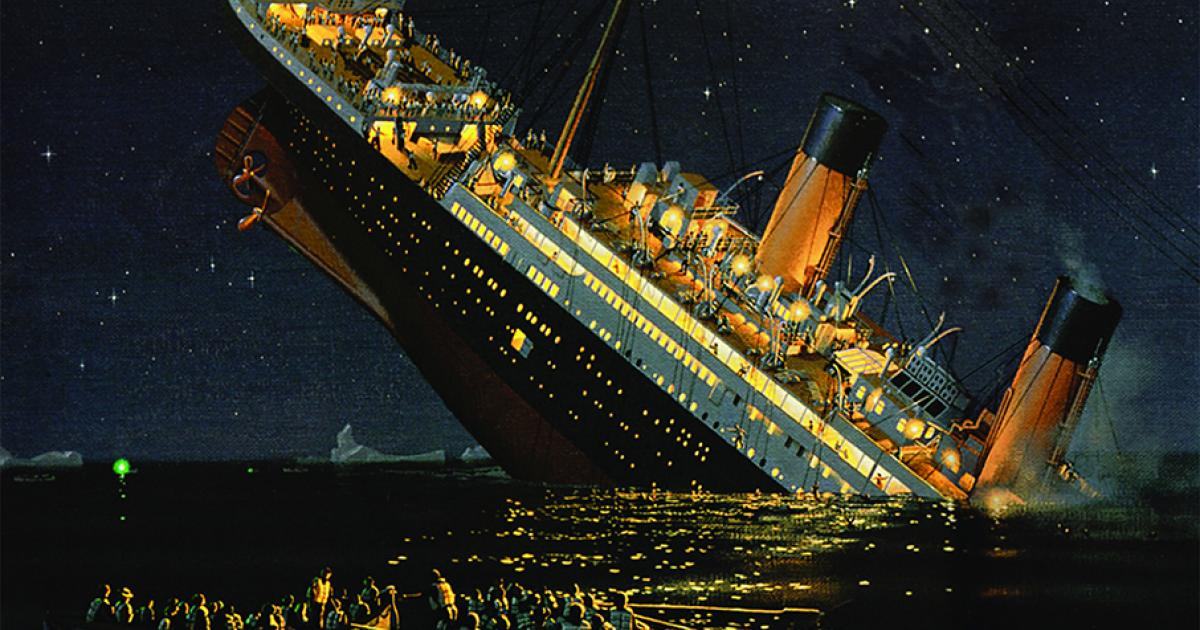


**ABOUT DATASET **

https://www.kaggle.com/datasets/rksensational/dataset


**Overview**

The data has been split into two groups:

*training set (train.csv)*

*test set (test.csv)*

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

**Variable Notes**

* pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower


* sibsp: The dataset defines family relations in this way.
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife 

* parch: The dataset defines family relations in this way.
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children traveled only with a nanny, therefore parch=0 for them.

**Importing Libraries**

This step involves importing all necessary libraries and modules required for data manipulation, analysis, and modeling. Common libraries include pandas for data handling, numpy for numerical operations, matplotlib and seaborn for data visualization, and scikit-learn for machine learning algorithms. Importing these libraries at the beginning of your script ensures that you have access to the functions and tools needed for your analysis.

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings

# Disable all warnings
warnings.simplefilter("ignore")


**Loading Data**

This step involves reading the dataset into a suitable data structure, such as a Pandas DataFrame. This is typically done using functions like pd.read_csv() for CSV files. Loading the data correctly ensures that you can start your analysis with the actual dataset.



In [69]:
train_df = pd.read_csv('/kaggle/input/dataset/train.csv')
test_df = pd.read_csv('/kaggle/input/dataset/test.csv')

train_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Exploratory Data Analysis (EDA) and Missing Data Check**

During this phase, you perform an initial exploration of the dataset to understand its structure, characteristics, and relationships between variables. This includes checking for missing values, outliers, and understanding data distributions. EDA helps in gaining insights into the dataset and identifying any issues that need to be addressed.

In [71]:
train_df.info() # shows data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
print(train_df.isna().sum()) # number of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Handling Missing Data**

After identifying missing values during the EDA phase, this step involves deciding how to handle them. This might include imputing missing values with mean, median, mode, or other statistical methods, or removing rows or columns with missing data. Proper handling of missing data is crucial for ensuring the quality and reliability of the analysis.

In [73]:
# Let's fill in the missing values in the Age column with the mean.
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)


# Let's fill in the missing values in the Embarked and Cabin columns with the most common categories, even though we might drop them later, just for demonstration purposes.
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

train_df['Cabin'].fillna(train_df['Cabin'].mode()[0], inplace=True)
test_df['Cabin'].fillna(test_df['Cabin'].mode()[0], inplace=True)


In [74]:
print(train_df.isna().sum()) # number of missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


**Visualizing Columns**

This involves creating visual representations of the columns in the dataset to better understand their distributions and relationships. Common visualizations include histograms, box plots, and bar charts. Visualization helps in identifying patterns, trends, and anomalies in the data.



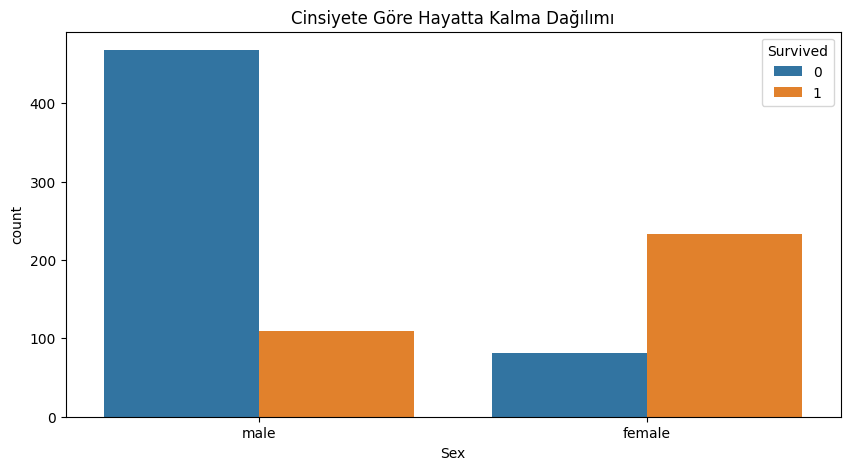

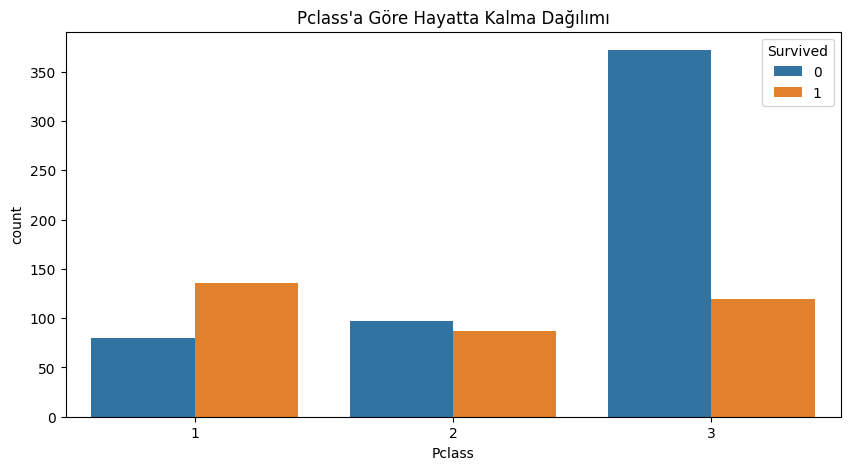

In [75]:
# Let's examine the effect of gender on survival status.
plt.figure(figsize=(10, 5))
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Survival Distribution by Gender")
plt.show()

# Effect of the Pclass column.
plt.figure(figsize=(10, 5))
sns.countplot(x="Pclass", hue="Survived", data=train_df)
plt.title("Survival Distribution by Pclass")
plt.show()



**Creating New Features**

This step involves generating new features from the existing data to enhance the model’s performance. New features can be created by combining existing features, performing mathematical transformations, or deriving features based on domain knowledge. Feature engineering can significantly impact the predictive power of your model.

In [76]:
# Let's create a new feature called FamilySize.
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1


In [77]:
train_df.info() # Shows data types and missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [78]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [79]:
train_df.describe() # Shows data types and missing values.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [80]:
test_df.describe() # Shows data types and missing values.

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,1.839713
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.907576,1.519072
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,11.000000


**Encoding Categorical Variables**

Categorical variables need to be converted into numerical values for most machine learning algorithms to process them. Encoding techniques such as one-hot encoding or label encoding are used to transform categorical data into a format suitable for model training.



In [81]:
# Let's convert the categorical columns Gender and Embarked to numerical values.
label_encoder = LabelEncoder()
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.transform(test_df['Sex'])

train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])
test_df['Embarked'] = label_encoder.transform(test_df['Embarked'])


In [82]:
test_df.head(5)
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,2,1


**Preparing Data for Modeling**

This step involves splitting the data into training and testing sets, normalizing or scaling features if necessary, and ensuring that the data is in the right format for modeling. Proper preparation is essential for training models effectively and evaluating their performance accurately.

In [83]:
# Separate the target and features
X = train_df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_df['Survived']

# The test set should be prepared in the same way
X_test_final = test_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test_final = scaler.transform(X_test_final)



**Training and Comparing Models**

In this phase, different machine learning models are trained using the prepared data. The performance of these models is compared using evaluation metrics such as accuracy, precision, recall, and F1-score. This helps in selecting the best model for the given problem.

In [84]:
# Logistic Regression
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
predict_LR = LR_model.predict(X_val)
LR_accuracy = accuracy_score(y_val, predict_LR)
print(f'Logistic Regression accuracy: {LR_accuracy*100:.2f}%')

# Decision Tree
DT = DecisionTreeClassifier(max_depth=3)
DT.fit(X_train, y_train)
predict_DT = DT.predict(X_val)
DT_accuracy = accuracy_score(y_val, predict_DT)
print(f'Decision Tree accuracy: {DT_accuracy*100:.2f}%')

# Random Forest
RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train, y_train)
predict_RF = RF.predict(X_val)
RF_accuracy = accuracy_score(y_val, predict_RF)
print(f'Random Forest accuracy: {RF_accuracy*100:.2f}%')

# XGBoost
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
predict_XGB = XGB.predict(X_val)
XGB_accuracy = accuracy_score(y_val, predict_XGB)
print(f'XGBoost accuracy: {XGB_accuracy*100:.2f}%')


Logistic Regression accuracy: 81.34%
Decision Tree accuracy: 81.34%
Random Forest accuracy: 77.61%
XGBoost accuracy: 79.10%


In [85]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

LNR_model = LinearRegression()
LNR_model.fit(X_train, y_train)
predict_LNR = LNR_model.predict(X_val)
# Since predictions in Linear Regression are continuous numbers, let's classify the predictions based on 0.5
predict_LNR = np.where(predict_LNR > 0.5, 1, 0)
LNR_accuracy = accuracy_score(y_val, predict_LNR)
print(f'Linear Regression accuracy: {LNR_accuracy*100:.2f}%')

# k-Nearest Neighbors 
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
predict_knn = knn_model.predict(X_val)
knn_accuracy = accuracy_score(y_val, predict_knn)
print(f'K-Nearest Neighbors accuracy: {knn_accuracy*100:.2f}%')

# Support Vector Machine 
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
predict_svm = svm_model.predict(X_val)
svm_accuracy = accuracy_score(y_val, predict_svm)
print(f'Support Vector Machine (SVM) accuracy: {svm_accuracy*100:.2f}%')



Linear Regression accuracy: 79.48%
K-Nearest Neighbors accuracy: 77.61%
Support Vector Machine (SVM) accuracy: 79.10%


**Visualizing Results**

After model training and evaluation, results are visualized to interpret and communicate findings effectively. This might include plotting confusion matrices, ROC curves, or performance metrics. Visualization helps in understanding how well the model performs and where improvements might be needed.

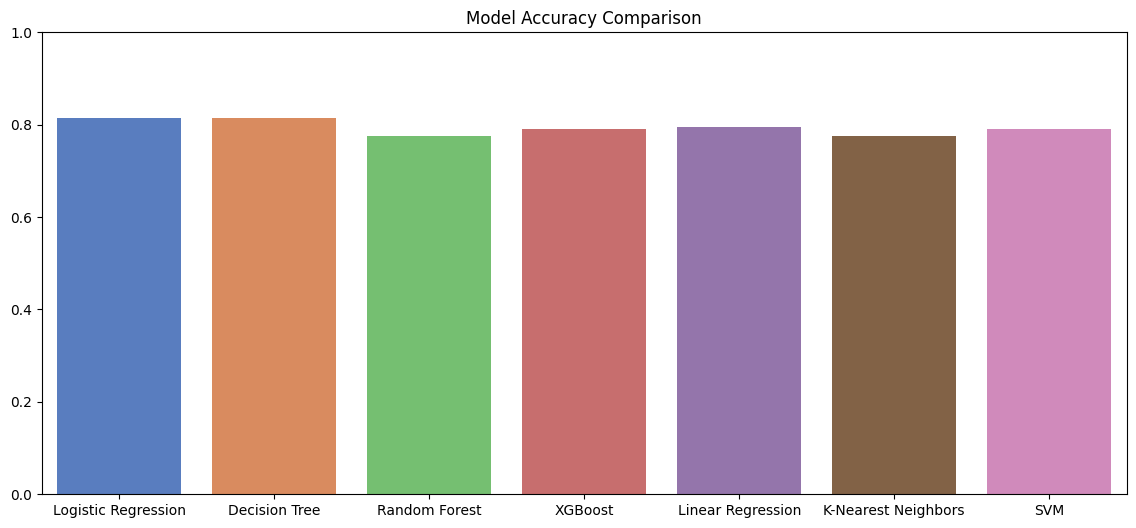

In [86]:
# Comparison of algorithms
algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost','Linear Regression', 'K-Nearest Neighbors', 'SVM']
accuracies = [LR_accuracy, DT_accuracy, RF_accuracy, XGB_accuracy, LNR_accuracy, knn_accuracy, svm_accuracy]

plt.figure(figsize=(14, 6))
sns.barplot(x=algorithms, y=accuracies, palette='muted')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.show()


In the code snippet provided, the cross_val_score function from sklearn.model_selection is used to perform cross-validation on a Logistic Regression model with a maximum of 1000 iterations for convergence. By evaluating the model on training data X_train and y_train using 5-fold cross-validation, it calculates accuracy scores for each fold. The individual cross-validation scores are then printed to show the model’s performance across different data subsets, followed by the average score, which provides an overall assessment of the model's accuracy. This approach ensures a robust evaluation of the model's performance and helps in identifying any potential overfitting or underfitting issues.




In [87]:
from sklearn.model_selection import cross_val_score

# Cross-validation with Logistic Regression model
LR_model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(LR_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and their average
print(f'Çapraz Doğrulama Skorları: {cv_scores}')
print(f'Ortalama CV Skoru: {np.mean(cv_scores)}')


Çapraz Doğrulama Skorları: [0.768      0.896      0.768      0.75       0.82258065]
Ortalama CV Skoru: 0.8009161290322581


In this code snippet, GridSearchCV from sklearn.model_selection is used to perform hyperparameter tuning for a Logistic Regression model. A grid of hyperparameters is defined in param_grid, specifying ranges for the regularization strength (C), the type of regularization penalty (penalty), and the solver (solver), which is suitable for small datasets. GridSearchCV is then initialized with the Logistic Regression model, the hyperparameter grid, 5-fold cross-validation, and accuracy as the scoring metric. It fits the model on the training data X_train and y_train, searching for the best combination of hyperparameters. The best parameters and the corresponding score are then printed, providing insight into the most effective hyperparameters and the performance of the tuned model.

In [88]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter ranges
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Küçük veri setleri için daha iyi çalışır
}

# Logistic Regression model and Grid Search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'En İyi Parametreler: {grid_search.best_params_}')
print(f'En İyi Skor: {grid_search.best_score_}')


Fitting 5 folds for each of 8 candidates, totalling 40 fits
En İyi Parametreler: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
En İyi Skor: 0.8009161290322581



In this code snippet, the best Logistic Regression model obtained from the GridSearchCV is selected using grid_search.best_estimator_. This best model is then used to make predictions on the validation set X_val. The predictions are evaluated using several metrics to assess the model's performance. The confusion_matrix function generates a confusion matrix to show the number of true positive, true negative, false positive, and false negative predictions. The classification_report function provides detailed metrics including precision, recall, and F1 score for each class. Finally, the accuracy_score function calculates the overall accuracy of the model, which is printed as a percentage. This comprehensive evaluation helps in understanding how well the model performs on unseen data and identifies areas for improvement.

In [89]:
# Select the best model
best_LR_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_LR_model.predict(X_val)

# Evaluation metrics for model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_val, y_pred)) # Confusion Matrix
print(classification_report(y_val, y_pred))  # Precision, Recall, F1 Score
print(f'Doğruluk (Accuracy): {accuracy_score(y_val, y_pred) * 100:.2f}%')


[[137  20]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Doğruluk (Accuracy): 81.34%


In this code snippet, the confusion_matrix, ConfusionMatrixDisplay, and classification_report functions from sklearn.metrics are used to evaluate and visualize the performance of a classification model. The plot_confusion_matrix function is defined to create and display a confusion matrix using Seaborn's heatmap. It calculates the confusion matrix with confusion_matrix(y_true, y_pred), which compares the true labels y_true with the predicted labels y_pred. The resulting matrix is visualized with annotations and a color map to represent different levels of prediction accuracy. This visualization provides a clear representation of how well the model performs across different classes. The plot_confusion_matrix function is then called with validation labels y_val and predicted labels y_pred to display the confusion matrix.

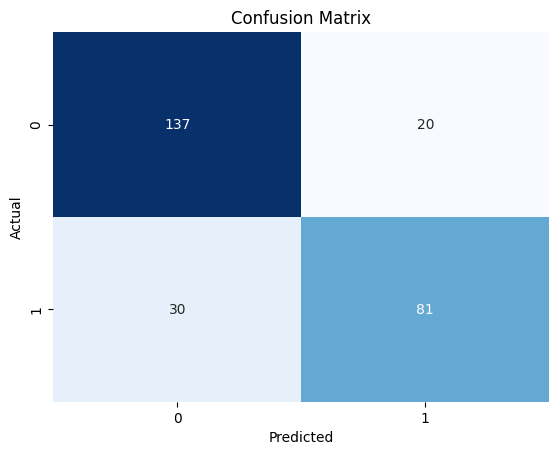

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Call the function for the confusion matrix
plot_confusion_matrix(y_val, y_pred)



____________________________________________________________________________________

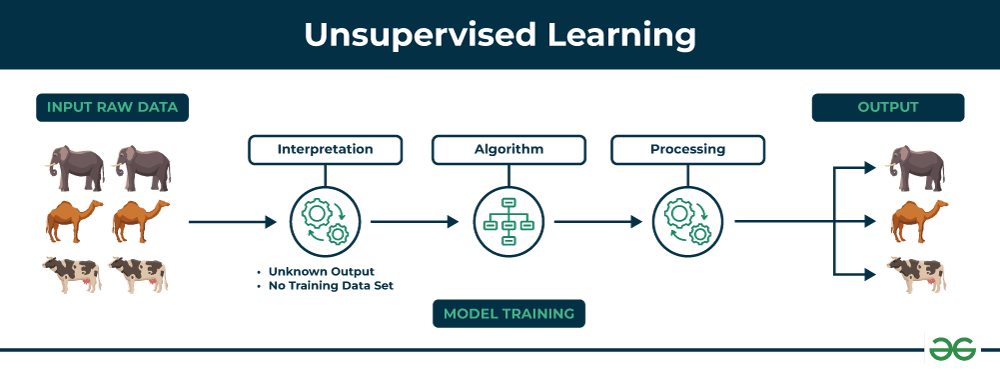

Unsupervised Learning involves training a model on data that is not labeled. The model tries to find patterns and relationships within the data without predefined categories. The primary goal is to identify underlying structures or groupings in the data. Unsupervised learning tasks include:

Clustering: Grouping similar data points into clusters based on their features. For example, customer segmentation in marketing to identify different customer groups.

Dimensionality Reduction: Reducing the number of features in the dataset while retaining as much information as possible. This helps in visualizing data and reducing complexity. Techniques include Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

Common algorithms used in unsupervised learning include:

* K-Means Clustering: For partitioning data into clusters.
* Hierarchical Clustering: For creating a tree of clusters.
* Principal Component Analysis (PCA): For reducing dimensionality and identifying important features.
* Autoencoders: For learning efficient representations of data.

In [92]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X)
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
# Silhouette score is not applicable for DBSCAN as it may produce noise points

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)
gmm_silhouette = silhouette_score(X, gmm_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette:.4f}')
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}')
print(f'GMM Silhouette Score: {gmm_silhouette:.4f}')

K-Means Silhouette Score: 0.7907
Hierarchical Clustering Silhouette Score: 0.8462
GMM Silhouette Score: 0.5228


In this code snippet, different clustering algorithms are applied to the dataset X to assess their performance using the silhouette score. KMeans clustering is performed with 2 clusters, and the silhouette score is calculated to evaluate the clustering quality. Similarly, AgglomerativeClustering is used for hierarchical clustering with 2 clusters, and its silhouette score is computed. For DBSCAN, a density-based clustering approach, the silhouette score is not applicable as DBSCAN may produce noise points that do not belong to any cluster. Lastly, GaussianMixture is applied to model the data with 2 components, and its silhouette score is calculated. The results are printed for each clustering method to compare their performance based on the silhouette score, which measures how well-separated and compact the clusters are.

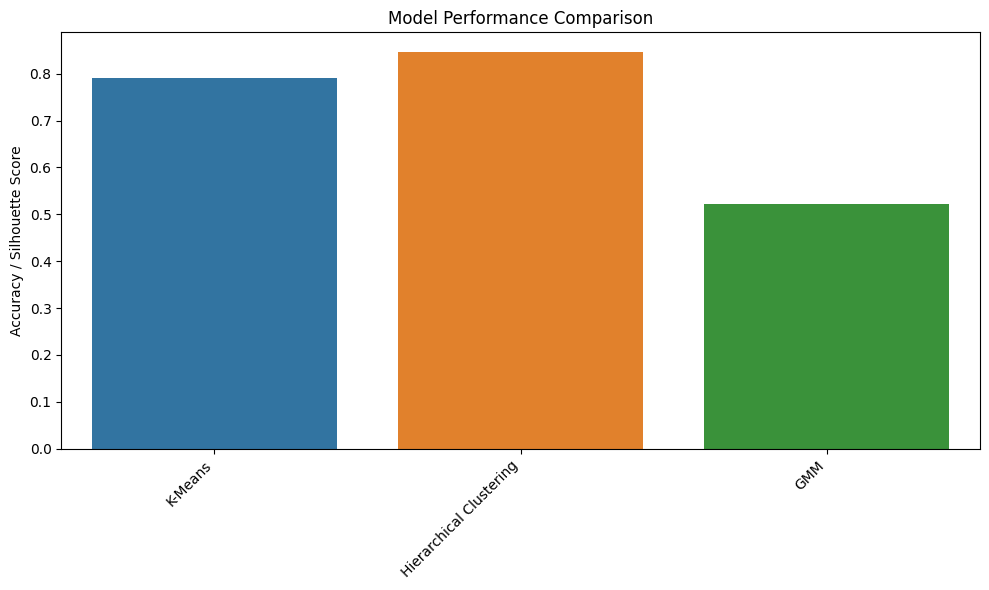

In [95]:
# Combine all model accuracies
model_accuracies = {
    'K-Means': kmeans_silhouette,
    'Hierarchical Clustering': hierarchical_silhouette,
    'GMM': gmm_silhouette
}

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy / Silhouette Score')
plt.tight_layout()
plt.show()

In this code snippet, several tasks are performed to evaluate and compare different clustering and classification models. First, the silhouette scores of KMeans, Hierarchical Clustering, and Gaussian Mixture Model (GMM) are combined into a dictionary and visualized using a bar plot to compare their performance. The plot displays the silhouette scores, providing a visual representation of how well each clustering algorithm performs.

Next, RandomizedSearchCV is used to perform hyperparameter tuning for a RandomForestClassifier. A parameter grid is defined with various options for n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf, and bootstrap. RandomizedSearchCV is initialized with the parameter grid, and it performs a random search over 100 iterations to find the best combination of hyperparameters. After fitting the model, the best parameters and cross-validation score are printed. The best model is then used to make predictions on the validation set, and its performance is evaluated using a classification report and accuracy score. Finally, the confusion matrix for the predictions is plotted to visually assess the model's performance.

Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best cross-validation score: 0.8379

Model Evaluation:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.80      0.69      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

Accuracy: 0.8022


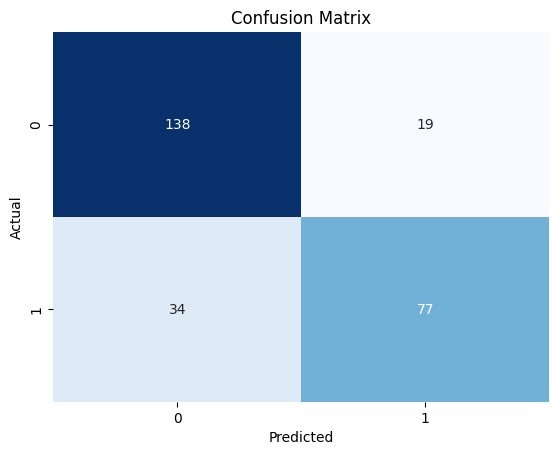

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Random search of parameters
rf_random = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=100, 
    cv=3, 
    verbose=0,  # Changed from 2 to 0
    random_state=42, 
    n_jobs=-1
)

# Fit the random search model
rf_random.fit(X_train, y_train)

print(f"Best parameters: {rf_random.best_params_}")
print(f"Best cross-validation score: {rf_random.best_score_:.4f}")

# Use the best model for prediction
best_rf_model = rf_random.best_estimator_
y_pred = best_rf_model.predict(X_val)

# Model evaluation
print("\nModel Evaluation:")
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")

# Plot confusion matrix
plot_confusion_matrix(y_val, y_pred)

In this code snippet, hierarchical clustering and its impact on subsequent classification tasks are explored.

First, hierarchical clustering is performed using AgglomerativeClustering with 2 clusters. The clustering labels are computed and the silhouette score, which measures the quality of the clustering, is calculated and printed. This score helps evaluate how well-separated and cohesive the clusters are.

Next, the hierarchical clustering labels are appended to the original feature set X, creating a new feature matrix X_clustered. This extended dataset is then used to train a LogisticRegression model. Cross-validation is applied to evaluate the performance of this logistic regression model on the clustered data, and the accuracy scores are printed along with their mean.

Additionally, GridSearchCV is employed to find the best hyperparameters for the logistic regression model, using the clustered features. The best parameters and score from this grid search are printed, providing insight into the optimal model configuration.

Finally, the best logistic regression model is used to make predictions on the clustered data. The confusion matrix and classification report are generated to evaluate the model's performance, providing detailed metrics on how well the model classifies each class.

This approach shows how hierarchical clustering can be integrated into a classification pipeline and assesses whether clustering enhances or impacts the classification performance.

In [100]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X)

# Hierarchical Clustering Evaluation
# Calculate silhouette score
from sklearn.metrics import silhouette_score
hierarchical_silhouette = silhouette_score(X, hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}')


Hierarchical Clustering Silhouette Score: 0.8462


In [103]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Encode hierarchical cluster labels
X_clustered = np.hstack([X, hierarchical_labels.reshape(-1, 1)])
log_reg = LogisticRegression(random_state=42)

# Cross-validation with hierarchical features
cv_scores_clustered = cross_val_score(log_reg, X_clustered, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy Scores with Clustering: {cv_scores_clustered}')
print(f'Mean CV Accuracy with Clustering: {np.mean(cv_scores_clustered):.4f}')

# Grid Search for Hyperparameter Tuning
grid_search_clustered = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search_clustered.fit(X_clustered, y)
print(f'Best Parameters with Clustering: {grid_search_clustered.best_params_}')
print(f'Best Score with Clustering: {grid_search_clustered.best_score_:.4f}')

# Train and Evaluate the best model with clustering
best_log_reg_clustered = grid_search_clustered.best_estimator_
y_pred_clustered = best_log_reg_clustered.predict(X_clustered)

# Confusion Matrix and Classification Report
conf_matrix_clustered = confusion_matrix(y, y_pred_clustered)
print(f'Confusion Matrix with Clustering:\n{conf_matrix_clustered}')

report_clustered = classification_report(y, y_pred_clustered, target_names=['Class 0', 'Class 1'])
print(f'Classification Report with Clustering:\n{report_clustered}')


Cross-Validation Accuracy Scores with Clustering: [0.7877095  0.78651685 0.78089888 0.7752809  0.82022472]
Mean CV Accuracy with Clustering: 0.7901
Best Parameters with Clustering: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score with Clustering: 0.7946
Confusion Matrix with Clustering:
[[471  78]
 [107 235]]
Classification Report with Clustering:
              precision    recall  f1-score   support

     Class 0       0.81      0.86      0.84       549
     Class 1       0.75      0.69      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.78       891
weighted avg       0.79      0.79      0.79       891



In this code snippet, a confusion matrix is computed to evaluate the performance of the logistic regression model trained with clustered features. The confusion matrix is calculated using the true labels y and the predicted labels y_pred_clustered. To facilitate better visualization, the confusion matrix is converted into a Pandas DataFrame with labels for both rows and columns, corresponding to the classes. This DataFrame is then used to create a heatmap plot using Seaborn. The heatmap displays the confusion matrix with annotations for each cell, a color map to represent values, and includes a color bar. This visual representation helps in understanding the model’s performance by clearly showing the counts of true positive, true negative, false positive, and false negative predictions.

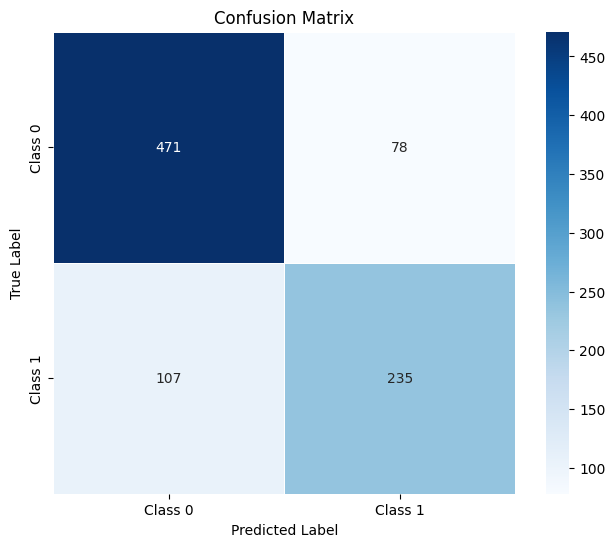

In [107]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y, y_pred_clustered)

# Create a DataFrame for better visualization with Seaborn
import pandas as pd
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Class 0', 'Class 1'], 
                              columns=['Class 0', 'Class 1'])

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', 
            cbar=True, square=True, linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**Summary:**

**Data Preparation:**

Handled missing values by imputing mean values for Age and Fare, and mode values for Embarked and Cabin.
Created a new feature, FamilySize, based on SibSp and Parch.
Encoded categorical features (Sex and Embarked) using Label Encoding.

**Model Training and Evaluation:**

Trained and evaluated several models: Logistic Regression, Decision Tree, Random Forest, XGBoost, Linear Regression, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM).
Compared model performances using accuracy scores.
Performed cross-validation and hyperparameter tuning for Logistic Regression using Grid Search and Randomized Search for Random Forest.

**Clustering Analysis:**

Applied K-Means, Hierarchical Clustering, DBSCAN, and Gaussian Mixture Models (GMM) for clustering.
Evaluated clustering performance using Silhouette Score.

**Enhanced Model Evaluation:**

Incorporated clustering labels into Logistic Regression and performed cross-validation.
Evaluated models with clustering features using Grid Search.

**Hyperparameter Tuning:**

Ensure you're using the best hyperparameters from your Grid Search or Randomized Search for each model in your final evaluations.
Feature Engineering:

Explore additional feature engineering techniques such as interaction terms or polynomial features to improve model performance.

**Model Comparison:**

Extend the model comparison section by including additional metrics such as ROC AUC, precision-recall curves, and feature importance.

**Visualization:**

Visualize feature importances from models like Random Forest or XGBoost.
Include more detailed plots for cross-validation performance and hyperparameter tuning results.

**Documentation:**

Make sure to document the rationale behind your decisions, such as why you chose specific hyperparameters or models, and how you handled specific data issues.

**Automated Pipeline:**

Consider using an automated pipeline with Pipeline and ColumnTransformer from sklearn to streamline data preprocessing and model training.

**Model Ensemble:**

Combine multiple models (e.g., stacking, blending) to potentially improve performance by leveraging the strengths of different algorithms.